## Examen 3
__Johana Marcela Vega Jiménez. c.c 1049654027__

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal con fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad. 



Realizando la relación de fuerza en un sistema masa resorte, tenemos la ecuación diferencial de segundo orden dependiente del tiempo $t$:
$$
\quad x'' +  \frac{b}{m} x' + \frac{k}{m} x = 0
$$
Donde $x$ es una posición temporal, $k$ es la constante elastica del resorte y $b$ es una cosntante positiva que depende del fluido donde se mueve el resorte el cual genera la fricción.

Al hacer un cambio de variable considerando:

$$ \quad v = x' $$

Reescribimos la ecuación original como una ecuación diferencial de primero orden para $v$:

$$ \quad v' +  \frac{b}{m} v + \frac{k}{m} x = 0$$

Y resolvemos el sistema considerando:


$$
U=\begin{bmatrix}
U_0\\
U_1
\end{bmatrix}=\begin{bmatrix}
x\\
v
\end{bmatrix}.
$$
Así
\begin{align}
\frac{\operatorname{d}}{\operatorname{d} t} 
\begin{bmatrix} 
x\\
v\\
\end{bmatrix}=&
\begin{bmatrix}
v\\
\frac{b}{m} v + \frac{k}{m} x\\
\end{bmatrix}\\
\frac{\operatorname{d}}{\operatorname{d} t} 
U=&
\begin{bmatrix}
U_1\\
\frac{b}{m}U_1 + \frac{k}{m}U_0\\
\end{bmatrix}
\end{align}

Con este sistema de ecuaciones podemos resolver el problema computacionalmente usando la función integrate.odeint



In [ ]:
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def EDO(U,t): #Definimos la ecuación diferencial 
    x,v= U
    m = 0.2 #kg
    b = 0.3 #Consideramos b como el coeficiente de fricción cinetica de una masa de madera moviendose en una superficie de piedra
    k = 1 
    return [      U[1], 
            -(b/m)*U[1] - (k/m)*U[0]]
    

In [22]:
x0s = np.random.uniform(-5,5,100) #Definimos valores iniciales aleatorios
v0s = np.random.uniform(-8,8,100)
tmax = 30

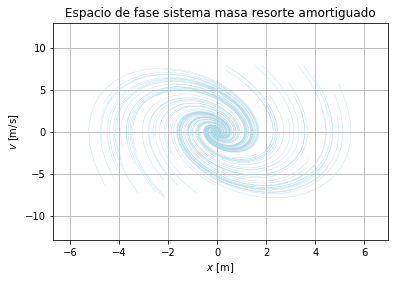

In [25]:
for x0, v0 in zip(x0s, v0s):
  t=np.linspace(0,tmax,400)
  y0=[x0,v0]
  y=integrate.odeint(EDO,y0,t)
  x=y[:,0]
  v=y[:,1]
  plt.plot(x,v,lw= 0.3,color="lightblue")
#Graficamos
plt.xlabel("$x$ [m]")
plt.ylabel("$v$ [m/s]")
plt.xlim((x0s.min()-2,x0s.max()+2))
plt.ylim((v0s.min()-5,v0s.max()+5))
plt.title("Espacio de fase sistema masa resorte amortiguado")
plt.grid(1)


2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

Constante de decaimiento: λ = 0.02476 ± 0.00036
La vida media  =  27.99 ±  0.41  años


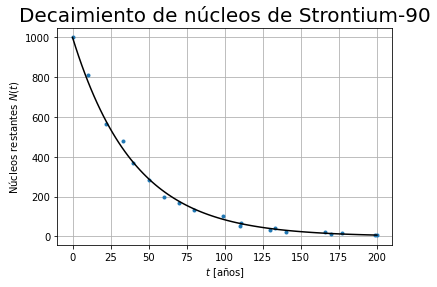

In [27]:
datos=pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
def N(t,lambd):
    N0 = 1000 # partículas en t = 0
    return N0*np.e**(-t*lambd)
lambdA,lambdAEr=optimize.curve_fit(N,datos['t'], datos['N(t)'])
lambd = lambdA[0]
deltalambd = np.sqrt(lambdAEr[0][0])
print(f'Constante de decaimiento: λ = {lambd :.5f} ± {deltalambd:.5f}')
Vmean = np.log(2)/lambd
deltaVmean = deltalambd*np.log(2)/(lambd**2)
print(f'La vida media  =  {Vmean:.2f} ±  {deltaVmean:.2f}  años')
t= np.linspace(0,200,100)
plt.plot(datos.t, datos['N(t)'], '.')
plt.plot(t, N(t,lambd), c='black')
plt.xlabel('$t$ [años]', size = 10)
plt.ylabel('Núcleos restantes $N(t)$', size = 10)
plt.grid()
plt.title('Decaimiento de núcleos de Strontium-90', size = 20)
plt.show()